<a href="https://colab.research.google.com/github/nitin-khandagale/blogposts/blob/master/brazilian_houses_to_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sidetable
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [ ]:
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')

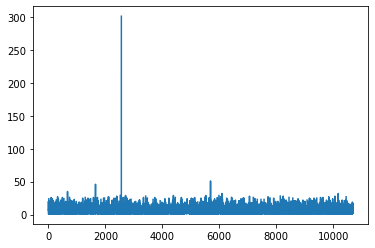

In [ ]:
plt.figure(figsize=(16))
df['floor'].plot()

In [ ]:
numeric_columns = [x for x in df.select_dtypes(exclude='object').columns]

In [ ]:
numeric_columns

['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'hoa (R$)',
 'rent amount (R$)',
 'property tax (R$)',
 'fire insurance (R$)',
 'total (R$)']

In [ ]:
for col in numeric_columns:
  col_name = col + '_zscore'
  df[col_name] = (df[col] - df[col].mean()) / df[col].std()

In [ ]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),area_zscore,rooms_zscore,bathroom_zscore,parking spaces_zscore,floor_zscore,hoa (R$)_zscore,rent amount (R$)_zscore,property tax (R$)_zscore,fire insurance (R$)_zscore,total (R$)_zscore
0,São Paulo,70,2,1,1,7.0,acept,furnished,2065,3300,211,42,5618,-0.147515,-0.432079,-0.878919,-0.383227,0.067716,0.057142,-0.174927,-0.050101,-0.236578,0.007735
1,São Paulo,320,4,4,0,20.0,acept,not furnished,1200,4960,1750,63,7973,0.318020,1.275475,1.252977,-1.012347,2.180189,0.001666,0.312084,0.445100,0.203046,0.150595
2,Porto Alegre,80,1,1,1,6.0,acept,not furnished,1000,2800,0,41,3841,-0.128893,-1.285856,-0.878919,-0.383227,-0.094782,-0.011161,-0.321617,-0.117994,-0.257513,-0.100062
3,Porto Alegre,51,2,1,0,2.0,acept,not furnished,270,1112,22,17,1421,-0.182895,-0.432079,-0.878919,-1.012347,-0.744774,-0.057979,-0.816843,-0.110915,-0.759941,-0.246864
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836,-0.231311,-1.285856,-0.878919,-1.012347,-0.907272,-0.075295,-0.908378,-0.109949,-0.885548,-0.282351


In [ ]:
df.shape

(10692, 23)

In [ ]:
import seaborn as sns

In [ ]:
df = df.drop(numeric_columns, axis='columns')

In [ ]:
df.head()

,city,animal,furniture,area_zscore,rooms_zscore,bathroom_zscore,parking spaces_zscore,floor_zscore,hoa (R$)_zscore,rent amount (R$)_zscore,property tax (R$)_zscore,fire insurance (R$)_zscore,total (R$)_zscore
0,São Paulo,acept,furnished,-0.147515,-0.432079,-0.878919,-0.383227,0.067716,0.057142,-0.174927,-0.050101,-0.236578,0.007735
1,São Paulo,acept,not furnished,0.318020,1.275475,1.252977,-1.012347,2.180189,0.001666,0.312084,0.445100,0.203046,0.150595
2,Porto Alegre,acept,not furnished,-0.128893,-1.285856,-0.878919,-0.383227,-0.094782,-0.011161,-0.321617,-0.117994,-0.257513,-0.100062
3,Porto Alegre,acept,not furnished,-0.182895,-0.432079,-0.878919,-1.012347,-0.744774,-0.057979,-0.816843,-0.110915,-0.759941,-0.246864
4,São Paulo,not acept,not furnished,-0.231311,-1.285856,-0.878919,-1.012347,-0.907272,-0.075295,-0.908378,-0.109949,-0.885548,-0.282351


In [ ]:
for col in df.select_dtypes(exclude='object').columns:
  df[col] = df[(df[col] > -3) & (df[col] < 3)][col]

In [ ]:
df.shape

(10692, 13)

In [ ]:
df.stb.missing()

,missing,total,percent
floor_zscore,2506,10692,23.438085
rent amount (R$)_zscore,256,10692,2.394314
fire insurance (R$)_zscore,178,10692,1.664796
parking spaces_zscore,159,10692,1.487093
bathroom_zscore,103,10692,0.963337
rooms_zscore,52,10692,0.486345
property tax (R$)_zscore,6,10692,0.056117
total (R$)_zscore,6,10692,0.056117
area_zscore,5,10692,0.046764
hoa (R$)_zscore,5,10692,0.046764


In [ ]:
df = df.dropna()

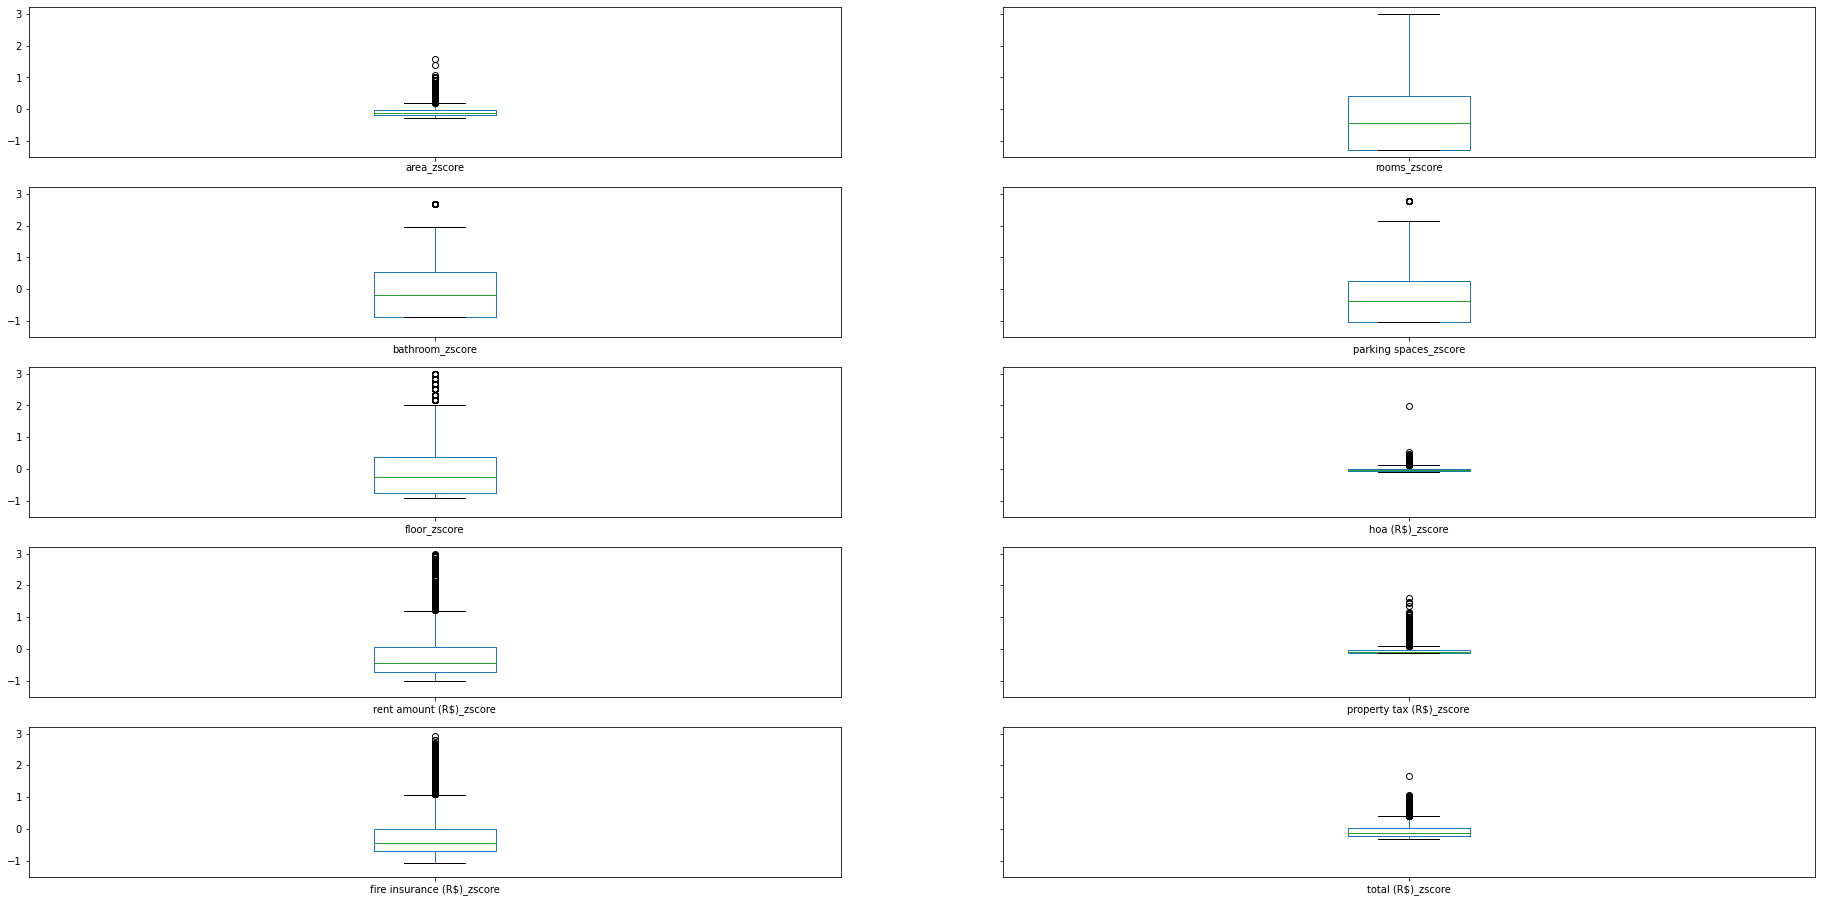

In [ ]:
df.select_dtypes('float64').plot(kind='box',subplots=True, layout=(5,2), sharex=True, sharey=True, figsize=(32,16))
plt.show()

In [ ]:
df.shape

(7994, 13)

In [ ]:
df.head()

,city,animal,furniture,area_zscore,rooms_zscore,bathroom_zscore,parking spaces_zscore,floor_zscore,hoa (R$)_zscore,rent amount (R$)_zscore,property tax (R$)_zscore,fire insurance (R$)_zscore,total (R$)_zscore
0,São Paulo,acept,furnished,-0.147515,-0.432079,-0.878919,-0.383227,0.067716,0.057142,-0.174927,-0.050101,-0.236578,0.007735
1,São Paulo,acept,not furnished,0.318020,1.275475,1.252977,-1.012347,2.180189,0.001666,0.312084,0.445100,0.203046,0.150595
2,Porto Alegre,acept,not furnished,-0.128893,-1.285856,-0.878919,-0.383227,-0.094782,-0.011161,-0.321617,-0.117994,-0.257513,-0.100062
3,Porto Alegre,acept,not furnished,-0.182895,-0.432079,-0.878919,-1.012347,-0.744774,-0.057979,-0.816843,-0.110915,-0.759941,-0.246864
4,São Paulo,not acept,not furnished,-0.231311,-1.285856,-0.878919,-1.012347,-0.907272,-0.075295,-0.908378,-0.109949,-0.885548,-0.282351


In [ ]:
for col in df.select_dtypes(include='object').columns:
  print(df[col].name, df[col].unique())

city ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
animal ['acept' 'not acept']
furniture ['furnished' 'not furnished']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,city,animal,furniture,area_zscore,rooms_zscore,bathroom_zscore,parking spaces_zscore,floor_zscore,hoa (R$)_zscore,rent amount (R$)_zscore,property tax (R$)_zscore,fire insurance (R$)_zscore,total (R$)_zscore
0,4,0,0,-0.147515,-0.432079,-0.878919,-0.383227,0.067716,0.057142,-0.174927,-0.050101,-0.236578,0.007735
1,4,0,1,0.318020,1.275475,1.252977,-1.012347,2.180189,0.001666,0.312084,0.445100,0.203046,0.150595
2,2,0,1,-0.128893,-1.285856,-0.878919,-0.383227,-0.094782,-0.011161,-0.321617,-0.117994,-0.257513,-0.100062
3,2,0,1,-0.182895,-0.432079,-0.878919,-1.012347,-0.744774,-0.057979,-0.816843,-0.110915,-0.759941,-0.246864
4,4,1,1,-0.231311,-1.285856,-0.878919,-1.012347,-0.907272,-0.075295,-0.908378,-0.109949,-0.885548,-0.282351


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('total (R$)_zscore', axis='columns')
y = df['total (R$)_zscore']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, random_state=42, test_size=0.2)

In [ ]:
x_train.shape

(6395, 12)

In [ ]:
x_test.shape

(1599, 12)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()

In [ ]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.score(x_test, y_test)

0.9968859455030633

In [ ]:
pred_rf = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mse = mean_squared_error(pred_rf, y_test)
mae = mean_absolute_error(pred_rf, y_test)
rmse = np.sqrt(mse)

In [ ]:
mse, mae , rmse

(0.00016743356733510005, 0.004254864294128101, 0.012939612333261769)